# Plotting and Visualization

In [1]:
# Making plots an static or interactive visualizations is one of the most important tasks in data analysis. 
# it may be a part of the exploratory process; for example, helping identify outliers,
# needed data transformations, or coming up with ideas for models.
# For others, building an interactive visualization for the web may be the end goal.
# Python has many add-on libraries for making static or dynamic visualizations,
# but they generally require some additional effort on the part of the user.

# Figures and Subplots

In [2]:
# toolkit like d3.js, which excels at transforming and animating the DOM.
# Plots in matplotlib reside within a Figure object, use plt.figure to create a new figure: 
from sympy import im


import matplotlib.pyplot as plt
fig = plt.figure()

<Figure size 640x480 with 0 Axes>

In [3]:
ax = fig.add_subplot(2, 2, 1)

In [4]:
ax2 = fig.add_subplot(2, 2, 2)

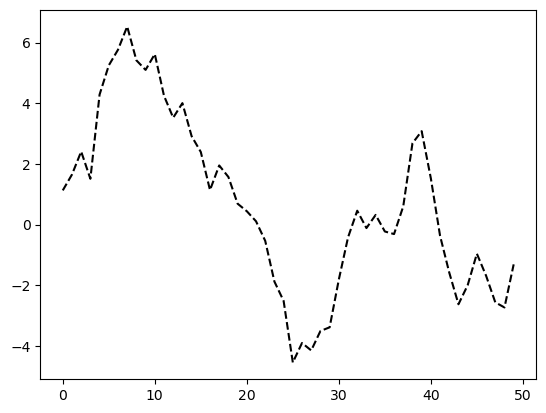

In [6]:
from numpy.random import randn 
import numpy as np
plt.plot(randn(50).cumsum(), 'k--')
plt.show()

In [7]:
_ = ax.hist(randn(100), bins=20, color='k', alpha=0.3)
ax2.scatter(np.arange(30), np.arange(30) + 3 * randn(30))

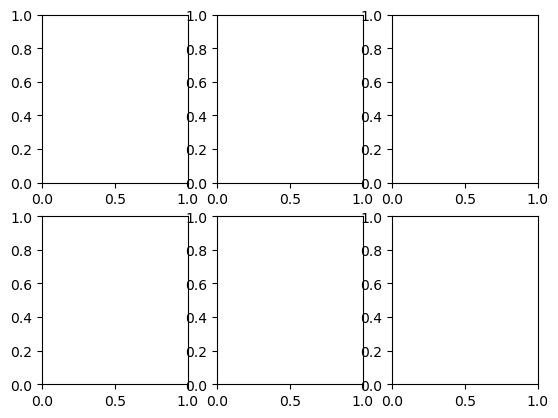

In [8]:
fig, axes = plt.subplots(2, 3)

In [9]:
axes

array([[<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >]], dtype=object)

In [10]:
# pyplot.subplots options 
# Argument    Description
# nrows       Number of rows of subplots
# ncols       Number of columns of subplots
# sharex      All subplots should use the same x-axis ticks (adjusting the xlim will affect all subplots)
# sharey      All subplots should use the same y-axis ticks (adjusting the ylim will affect all subplots)
# subplot_kw Dict of keywords passed to add_subplot call used to create each subplot
# **fig_kw    Additional keywords to subplots are used when creating the figure, such as plt.subplots(2, 2, figsize=(8, 6))


# Adjusting the spacing around subplots

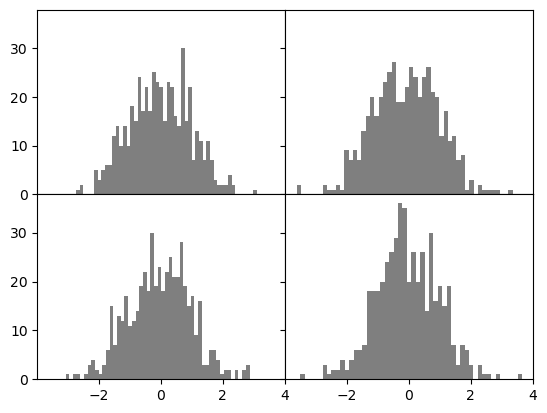

In [11]:
# By default matplotlib leaves a certain amount of padding around the outside of the subplots and spacing between subplots.
# This spacing is all specified relative to the height and width of the plot, so that if you resize the plot either programmatically or manually using the GUI window,
# the plot will dynamically adjust itself. You can change the spacing using the subplots_adjust method on Figure objects,
# also available as a top-level function: 
# subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=None) 
# wspace and hspace controls the percent of the figure width and figure height, respectively, to use as spacing between subplots.
# Here is a small example where I shrink the spacing and move the ticks and labels inward on the axes: 
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True) 
for i in range(2):
    for j in range(2):
        axes[i, j].hist(randn(500), bins=50, color='k', alpha=0.5)
plt.subplots_adjust(wspace=0, hspace=0)

# Colors, Markers and Line Styles

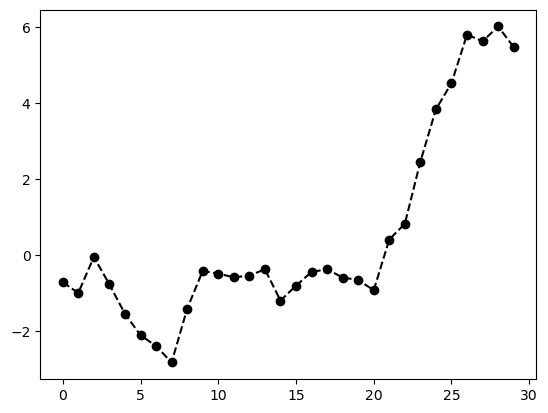

In [6]:
# Matplotlib's main "plot" function accepts arrays of X and Y coordinates and optionally a string abbreviation indicating color and line style. 
# For example, to plot x versus y with green dashes, you would execute: 
# ax.plot(x, y, 'g--') 
# This way of specifying both color and linestyles in a string is provided as convenience;
# in practice if you were creating plots programmatically you might prefer not to have to munge strings together to create plots with the desired style. 
# The same plot could also have been expressed more explicitly as: 
# ax.plot(x, y, linestyle='--', color='g') 
# there are a number of color abbreviations provided for commonly-used colors, but you can use any color on the spectrum by specifying its hex code 
# (e.g., '#CECECE'). You can see the ful set of linestyles by looking at the docstring for plot. 
# Line plots can additionally have markers to highlight the actual data points. 
# Since matplotlib creates a continuous line plot, interpolating between points, it can occasionally be unclear where the points lie. 
# The marker can be part of the style string, which must have color followed by marker type and line style: 
import matplotlib.pyplot as plt
from numpy.random import randn
import numpy as np
plt.plot(randn(30).cumsum(), 'ko--')

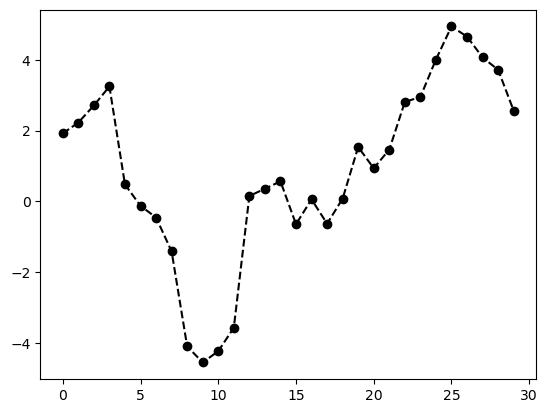

In [7]:
# This could also have been written more explicitly as:
plt.plot(randn(30).cumsum(), color='k', linestyle='dashed', marker='o') 

In [2]:
# For line plots, you will notice that subsequent points are linearly interpolated by default.
# This can be altered with the drawstyle option:
import matplotlib.pyplot as plt
from numpy.random import randn
import numpy as np
data = randn(30).sum() 

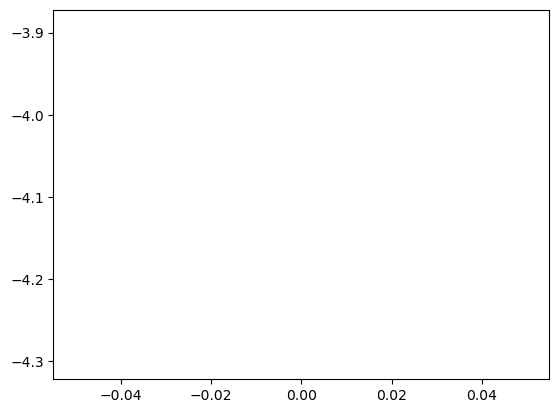

In [3]:
plt.plot(data, 'k--', label='Default') 

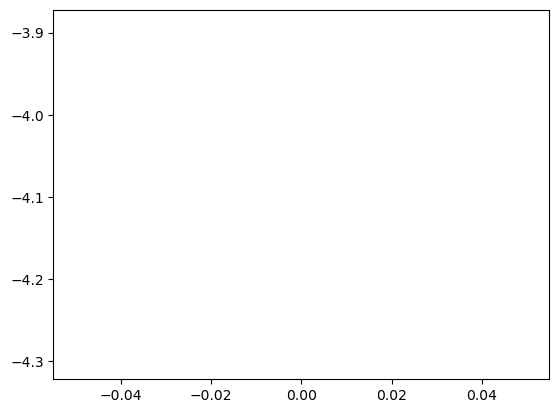

In [4]:
plt.plot(data, 'k-', drawstyle='steps-post', label='steps-post') 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


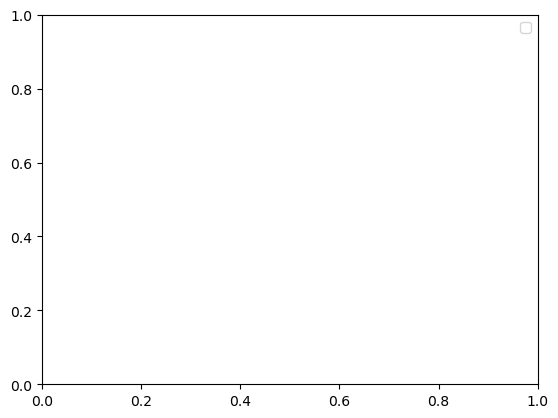

In [5]:
plt.legend(loc='best')

# Ticks, Labels and Legends

In [6]:
# For most kinds of plot decorations, there are two main ways to do things:
# using the procedural pyplot interface(which will be very familiar to MATLAB users) and the more object-oriented native matplotlib API.

# The pyplot interface, designed for interactive use, consists of methods like xlim, xticks, and xticklabels. 
# These control the plot range, tick locations, and tick labels, respectively.

# They can be used in two ways:
# Called with no arguments returns the current parameter value. For example plt.xlim() returns the current X axis plotting range 
# Called with parameters sets the parameter value. So plt.xlim([0, 10]), sets the X axis range to 0 to 10. 

In [7]:
# All such methods act on the active or most recently-created AxesSubplot.
# Each of them corresponds to two methods on the subplot object itself; in the case of xlim these are ax.get_xlim and ax.set_xlim. 

# Setting the title, axis labels, ticks, and ticklabels

Text(0.5, 0, 'Stages')

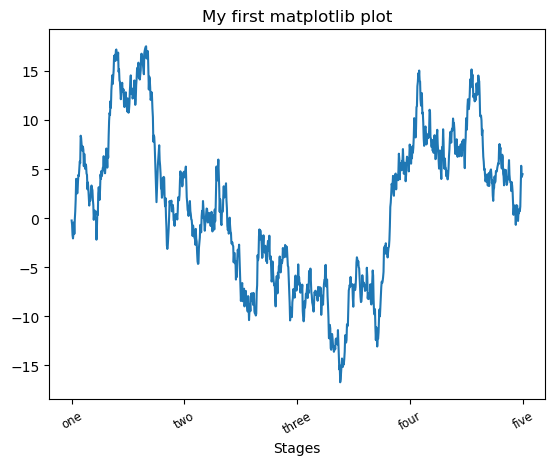

In [12]:
# To illustrate customizing the axes, I'll create a simple figure and plot of some data: 
import matplotlib.pyplot as plt
from numpy.random import randn
import numpy as np
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(randn(1000).cumsum())
# To change the X axis ticks, it's easiest to use set_xticks and set_xticklabels. 
# The former instructs matplotlib where to place the ticks along the data range;
# by default these locations will also be the labels. 
# But we can set any other values as the labels using set_xticklabels:

ticks = ax.set_xticks([0, 250, 500, 750, 1000]) 
labels = ax.set_xticklabels(['one', 'two', 'three', 'four', 'five'], rotation=30, fontsize='small') 
# Lastly, set_xlabel gives a name to the X axis and set_title the subplot title:
ax.set_title('My first matplotlib plot')
ax.set_xlabel('Stages') 


# Adding legends

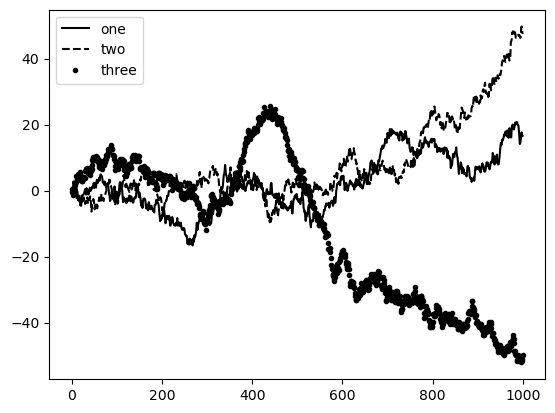

In [13]:
# Legends are another critical element for identifying plot elements. 
# There are a couple of ways to add one. 
# The easiest is to pass the label argument when adding each piece of the plot: 
from numpy.random import randn
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure(); ax = fig.add_subplot(1, 1, 1)
ax.plot(randn(1000).cumsum(), 'k', label='one')
ax.plot(randn(1000).cumsum(), 'k--', label='two')
ax.plot(randn(1000).cumsum(), 'k.', label='three')
# Once you have a set of labels, you can create a legend using the legend method.
# There are a couple of ways to do it; the easiest is to pass the label argument when adding each piece of the plot:
ax.legend(loc='best')

# Annotations and Drawing on a Subplot

In [15]:
# # Annotations and text can be added using the text, arrow, and annotate functions. 
# # text draws text at given coordinates(x,y) on the plot with optional custom styling:
# from datetime import datetime
# import matplotlib.pyplot as plt
# import numpy as np
# import pandas as pd 
# fig = plt.figure()
# ax = fig.add_subplot(1, 1, 1)
# data = pd.read_csv('examples/spx.csv', index_col=0, parse_dates=True) sample dataset 
# spx = data['SPX']
# spx.plot(ax=ax, style='k-')
# crisis_data = [(datetime(2007, 10, 11), 'Peak of bull market'), (datetime(2008, 3, 12), 'Bear Stearns Fails'), (datetime(2008, 9, 15), 'Lehman Bankruptcy')]
# for date, label in crisis_data:
#     ax.annotate(label, xy=(date, spx.asof(date) + 50), xytext=(date, spx.asof(date) + 200), arrowprops=dict(facecolor='black'), horizontalalignment='left', verticalalignment='top')
# # We drew the labels and arrows with ax.annotate.
# # The first two arguments to this function are the text to place and the x and y coordinates of the point being annotated.

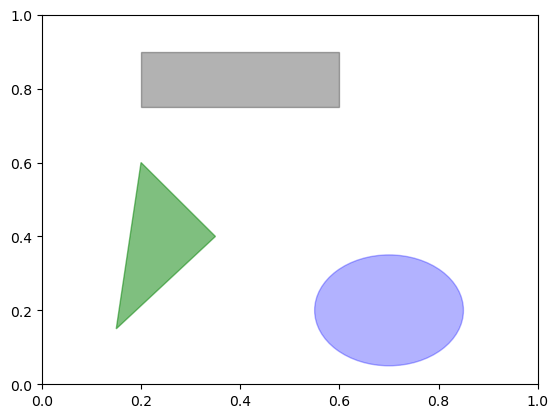

In [16]:
# Drawing shapes requires some more care. 
# matplotlib has objects that represent many shapes, referred to as patches.
# Some of these, like Rectangle and Circle are found in matplotlib.pyplot, but the full set is located in matplotlib.patches.
# To add a shape to a plot, you create the patch object shp and add it to a subplot by calling ax.add_patch(shp):
import matplotlib.pyplot as plt
from numpy.random import randn
import numpy as np
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color='k', alpha=0.3)
circ = plt.Circle((0.7, 0.2), 0.15, color='b', alpha=0.3)
pgon = plt.Polygon([[0.15, 0.15], [0.35, 0.4], [0.2, 0.6]], color='g', alpha=0.5)
ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)

# Saving Plots to File

In [17]:
# The active figure can be saved to file using plt.savefig. 
# This method is equivalent to the figure object's savefig instance method. 
# For example, to save an SVG version of a figure, you can do:
# plt.savefig('figpath.svg') 

In [18]:
# plt.savefig('figpath.png', dpi=400, bbox_inches='tight') 
# The dpi, or dots per inch, and bbox_inches are set here.
# To save a figure to PNG, PDF, or another file format, simply change the file extension in the path.
# You can see a full list of available file types by using plt.gcf().canvas.get_supported_filetypes().
# savefig doesn't have to write to disk, it can also write to any file-like object, such as a BytesIO:
# from io import BytesIO
# buffer = BytesIO()
# plt.savefig(buffer)
# plot_data = buffer.getvalue() 

In [19]:
# Figure.savefig options 
# Argument            Description
# fname               String containing a filepath or a Python file-like object. The figure format is inferred from the file extension, e.g. .pdf for PDF or .png for PNG.
# dpi                 The figure resolution in dots per inch; defaults to 100 out of the box but can be configured
# facecolor, edgecolor The color of the figure background outside of the subplots; 'w' (white), by default
# format              The explicit file format to use ('png', 'pdf', 'svg', 'ps', 'eps', ...)
# bbox_inches        The portion of the figure to save; if 'tight' is passed, will attempt to trim the empty space around the figure
# transparent        Setting this to True makes the figure and axes backgrounds transparent in the saved image. This is useful if you want to overlap multiple figures, e.g., with plt.subplots 

# matplotlib Configuration

In [20]:
# matplotlib comes configures with color schemes and defaults that are geared primarily toward preparing figures for publication. 
# Fortunately, nearly all of the default behavior can be customized via an extensive set of global parameters governing figure size, 
# subplot spacing, colors, font sizes, grid styles and so on. 
# There are two main ways to interact with the matplotlib configuration system. 
# The first is programmatically from Python using the rc method. 
# For example, to set the global default figure size to be 10 x 10, you could enter:
# plt.rc('figure', figsize=(10, 10))
# The first argument to rc is the component you wish to customize, such as 'figure', 'axes', 'xtick', 'ytick', 'grid' 
# or 'legend' among others. After that can follow a sequence of keyword arguments indicating the new parameters.
# An easy way to write down the options in your program is as a dict: 
# font_options = {'family' : 'monospace', 'weight' : 'bold', 'size' : 'small'}
# plt.rc('font', **font_options)

# Plotting Functions in pandas

In [21]:
# As you've seen, matplotlib is actually a fairly low-level tool. 
# You assemble a plot from its components: the data display (the type of plot: line, bar, box, scatter, contour, etc.),
# legend, title, tick labels, and other annotations.
# Part of the reason for this is that in many cases the data needed to make a complete plot is spread across many objects. 
# In pandas we have row labels, column labels, and possibly grouping information. 
# This means that many kinds of fully - formed plots that would ordinarily require a lot of matplotlib code can be expressed in one or two concise statements.
# Therefore, pandas has an increasing number of high-level plotting methods for creating standard visualizations that take advantage of how data is organized in DataFrame objects.

# Line Plots 

<Axes: >

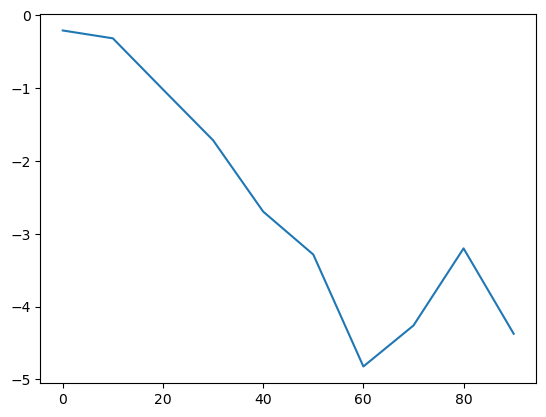

In [22]:
# Series and DataFrame each have a plot attribute for making some basic plot types. 
# By default, plot() makes line plots: 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import randn
s = pd.Series(np.random.randn(10).cumsum(), index=np.arange(0, 100, 10))
s.plot()

<Axes: >

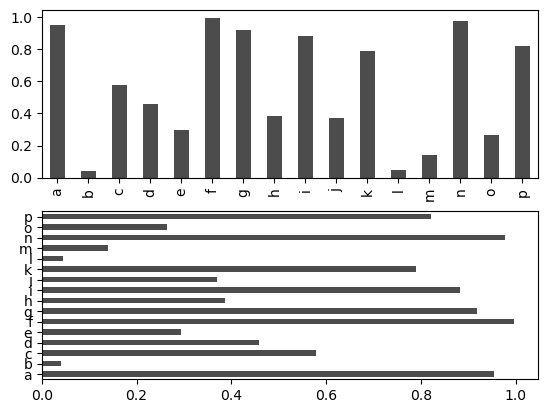

In [23]:
# The Series object's index is passed to matplotlib for plotting on the X axis, though you can disable this by passing use_index=False. 
# The X axis ticks and limits can be adjusted with the xticks and xlim options, and Y axis respectively with yticks and ylim.
# See Table for a full listing of options.
# Most of pandas's plotting methods accept an optional ax parameter, which can be a matplotlib subplot object.
# This gives you more flexible placement of subplots in a grid layout.
# For example, you can create an 2 x 2 grid of subplots and share the X and Y axes across all plots:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import randn
fig, axes = plt.subplots(2, 1)
data = pd.Series(np.random.rand(16), index=list('abcdefghijklmnop'))
data.plot.bar(ax=axes[0], color='k', alpha=0.7)
data.plot.barh(ax=axes[1], color='k', alpha=0.7)

In [24]:
# Series.plot method argument
# Argument            Description
# label               Label for plot legend
# ax                  matplotlib subplot object to plot on; if nothing passed, uses active matplotlib subplot
# style               Style string, like 'ko--', to be passed to matplotlib
# alpha               The plot fill opacity (from 0 to 1)
# kind                Can be 'area', 'bar', 'barh', 'density', 'hist', 'kde', 'line', 'pie'
# logy                Use logarithmic scaling on the Y axis
# use_index           Use the object index for tick labels
# rot                 Rotation of tick labels (0 through 360)
# xticks              Values to use for X axis ticks
# yticks              Values to use for Y axis ticks
# xlim                X axis limits (e.g. [0, 10])
# ylim                Y axis limits
# grid                Display axis grid (on by default)

<Axes: >

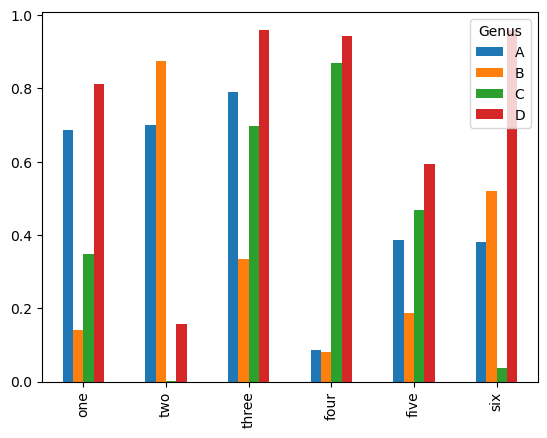

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import randn
from pandas import DataFrame 
df = DataFrame(
                np.random.rand(6, 4), 
                index=['one', 'two', 'three', 'four', 'five', 'six'],
                columns=pd.Index(['A', 'B', 'C', 'D'], name='Genus'))
df.plot(kind='bar')

In [26]:
# DataFrame - specific plot arguments
# Argument            Description
# subplots            Plot each DataFrame column in a separate subplot
# sharex              If subplots=True, share the same X axis, linking ticks and limits
# sharey              If subplots=True, share the same Y axis
# figsize             Size of figure to create as tuple
# title               Plot title as string
# legend              Add a subplot legend (True by default)
# sort_columns        Plot columns in alphabetical order; by default uses existing column order

# Bar Plots

<Axes: >

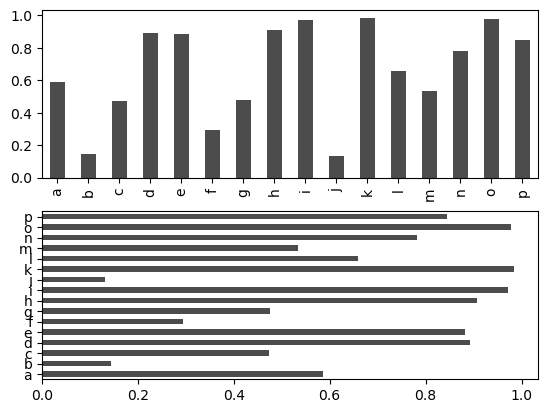

In [29]:
# Making bar plots instead of line plots is a simple as passing kind='bar' (for vertical bars) or kind='barh' (for horizontal bars). 
# In this case, the Series or DataFrame index will be used as the X(bar) or Y(barh) ticks: 

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import randn
from pandas import DataFrame
fig, axes = plt.subplots(2, 1)
data = pd.Series(np.random.rand(16), index=list('abcdefghijklmnop'))
data.plot.bar(ax=axes[0], color='k', alpha=0.7)
data.plot.barh(ax=axes[1], color='k', alpha=0.7)

<Axes: >

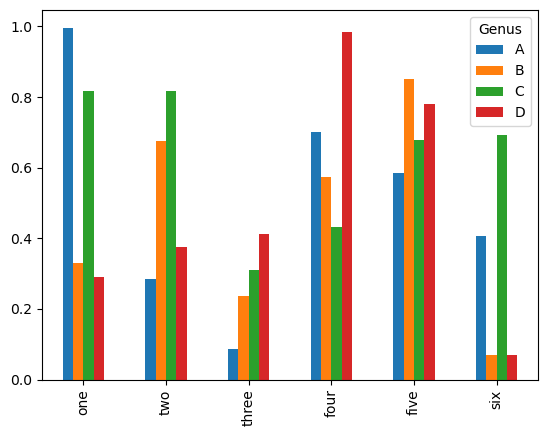

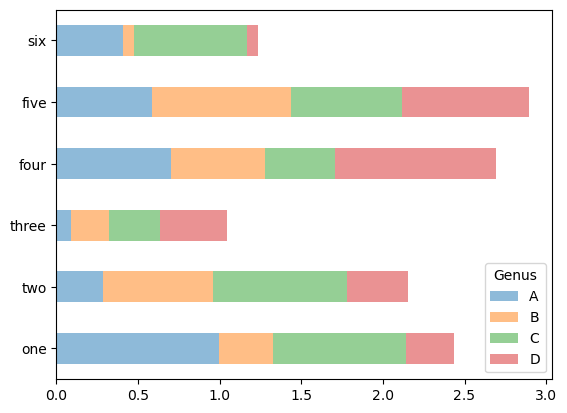

In [31]:
# With a DataFrame, bar plots group the values in each row together in a group in bars, side by side, for each value.

df= DataFrame(
                np.random.rand(6, 4), 
                index=['one', 'two', 'three', 'four', 'five', 'six'],
                columns=pd.Index(['A', 'B', 'C', 'D'], name='Genus')) 
df.plot.bar()
df.plot.barh(stacked=True, alpha=0.5) 

# Histograms and Density Plots

<Axes: >

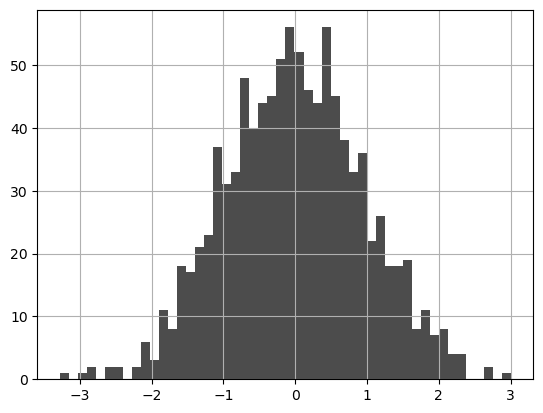

In [32]:
# A histogram, with which you may be well-acquainted, is a kind of bar plot that gives a discretized display of value frequency. 
# The data points are split into discrete, evenly spaced bins, and the number of data points in each bin is plotted. 
# Using the data from the previous example, we can make a histogram by calling plot.hist on the Series:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import randn
from pandas import DataFrame
data = pd.Series(np.random.randn(1000))
data.hist(bins=50, color='k', alpha=0.7)

<Axes: ylabel='Density'>

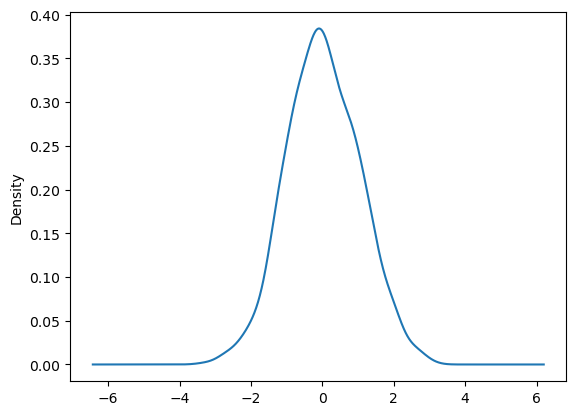

In [33]:
# A related plot type is a density plot, which is formed by computing an estimate of a continuous probability distribution that might have generated the observed data.
# A usual procedure is to approximate this distribution as a mixture of "kernels" that is simpler distributions like the normal (Gaussian) distribution. 
# Thus, density plots are also known as KDE(kernel density estimate) plots.
# Using plot.kde makes a density plot using the conventional mixture-of-normals estimate: 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import randn
from pandas import DataFrame
data = pd.Series(np.random.randn(1000))
data.plot.density()

<Axes: ylabel='Density'>

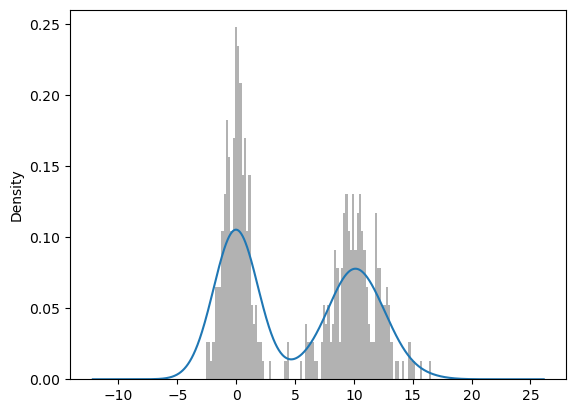

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import randn
from pandas import DataFrame
from pandas import Series 

comp1 = np.random.normal(0, 1, size=200) # N(0, 1) 
comp2 = np.random.normal(10, 2, size=200) # N(10, 4) 
values = Series(np.concatenate([comp1, comp2]))
values.hist(bins=100, alpha=0.3, color='k', density=True)  
values.plot.density()

# Scatter Plots

In [36]:
# Scatter plots are a useful way of examining the relationship between two one-dimensional data series.
# In the following example, we'll use the macrodata dataset introduced in the previous chapter:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import randn
from pandas import DataFrame
from pandas import Series
import seaborn as sns 

df = sns.load_dataset('iris')

<Axes: xlabel='sepal_length', ylabel='sepal_width'>

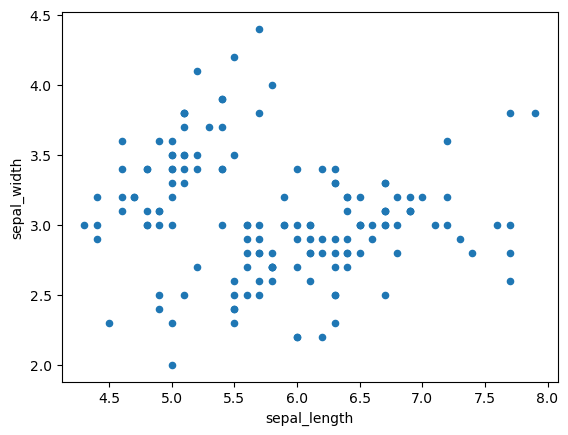

In [37]:
df.plot.scatter(x='sepal_length', y='sepal_width') 

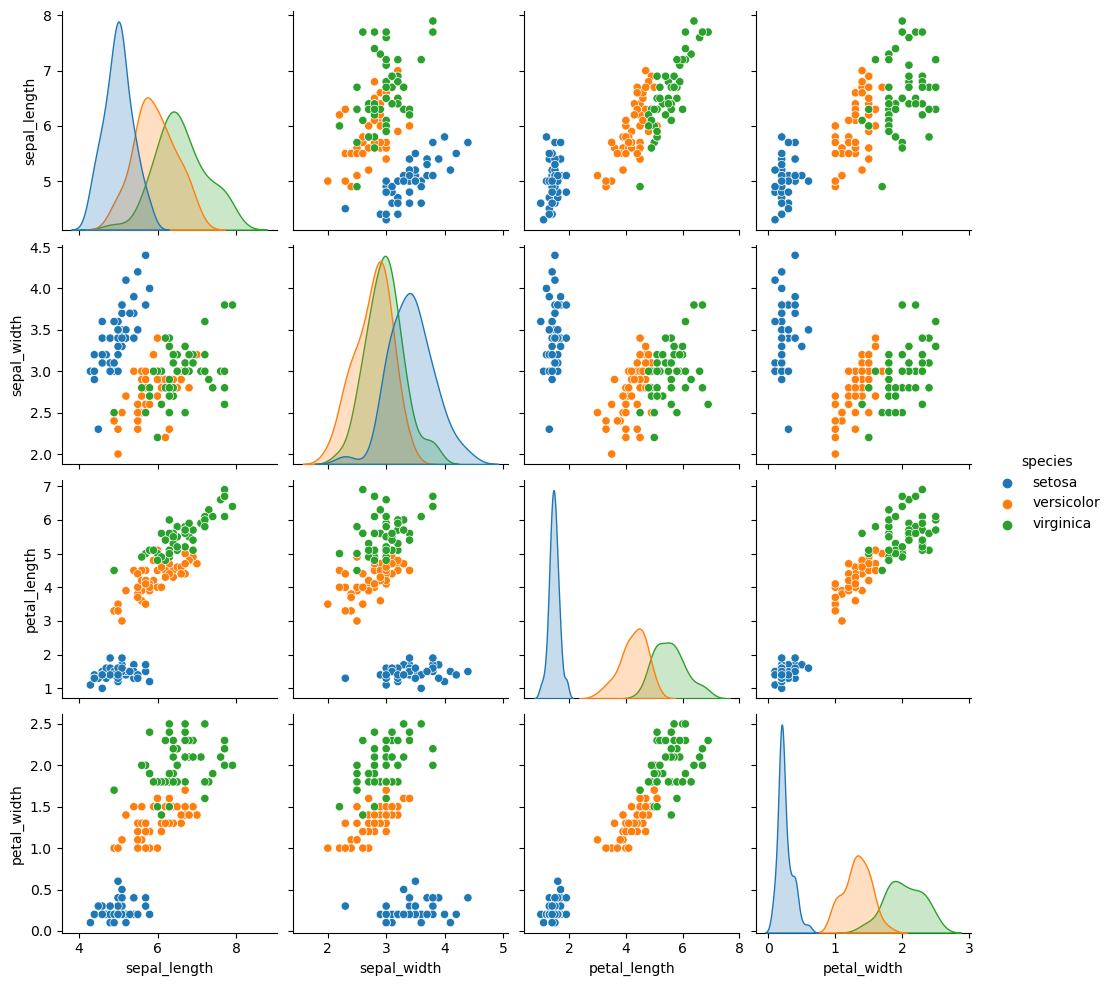

In [38]:
# In exploratory data analysis it's helpful to be able to look at all the scatter plots among a group of variables;
# this is known as a pairs plot or scatter plot matrix.
# Making such a plot from scratch is a bit of a chore, so seaborn has a convenient pairplot function,
# which supports placing histograms or density estimates of each variable along the diagonal.
# The full matrix of scatter plots and histograms is created with the following code:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import randn
from pandas import DataFrame
from pandas import Series
import seaborn as sns
df = sns.load_dataset('iris')
sns.pairplot(df, hue='species', height=2.5) 